# SCC5830 - Final project

**Name**: Juliano Genari de Araujo<br />
**USP Number**: 13700224<br />
**Course**: SCC5830 - Image Processing and Analysis<br />
**Semester***: 2022/1<br />
**Date**: 2022-07-17


In [27]:
from functions import get_board_mask, plot_images, segregate_image
import matplotlib.pyplot as plt
import imageio
import os
import numpy as np

img1 = imageio.imread(os.path.join("test_images", "green_1.jpg"))
img2 = imageio.imread(os.path.join("test_images", "green_2.jpg"))
img3 = imageio.imread(os.path.join("test_images", "back_layer_visible_1.jpg"))
img4 = imageio.imread(os.path.join("test_images", "red_1.jpg"))
img5 = imageio.imread(os.path.join("test_images", "blue_1.jpg"))

## Introduction

The main goal of this project id to create an algorithm to segregate, a reasonable well lit image, Printed Circuit Boards (PCBs) on to trails, components, silkscreen, etc, and generate high contrast images to help with reverse engineering tasks.

## Algorith description

### Background detection

The first step in our algorith is to try to separate the background, gigen an uniform background, the follwoing steps are done:

1. Make a hue histogram of the image, inicially with an small number of bins;
2. Try to identify two peaks in the histogram, (values above the mean), if not able increase the number of bins and repeat 1;
3. Make masks of the regions identified by the peaks in hue;

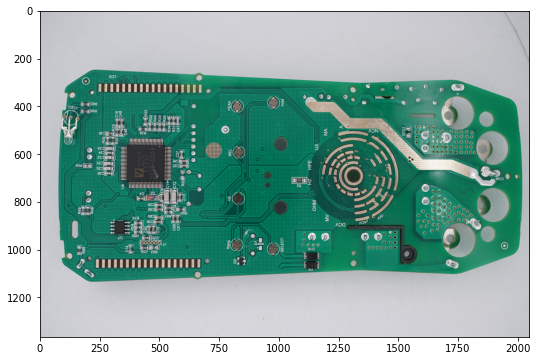

In [2]:
plt.figure(figsize=(10, 6))
plt.imshow(img1)
plt.show()

get_board_mask(img1, show_histograms=True, figsize=(6, 4))

4. Calulate the mean value of border pixels for each mask, and the mean value for the entire image;
5. Eliminate the mask with the biggest value for the border (this mask is probably the backgound);
6. Select the remaining mask with the biggest area for the board mask;

In [5]:
_ = plot_images(
    get_board_mask(img1, return_segregation_masks=True),
    cmaps=["gray", "gray"],
    layout=(1, 2),
    figsize=(15, 8)
)


7. Apply a closing operartion on this mask;
8. Use a fill from (0,0) to eliminate deatached clusters in the middle of the image.

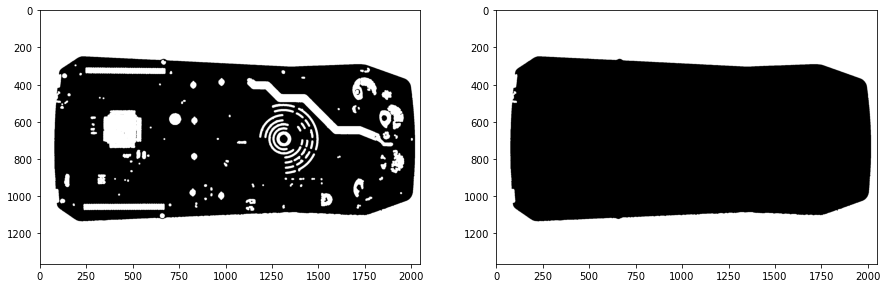

In [6]:
_ = plot_images(
    get_board_mask(img1, return_final_masks=True),
    cmaps=["gray", "gray"],
    layout=(1, 2),
    figsize=(15, 8)
)

The segregation of the backgound using this algorith won't aways work:

Selected background might not be correct, if the image has a not smooth background please crop it to the PCB.
Unable to find background, if the image has a not smooth background please crop it to the PCB.


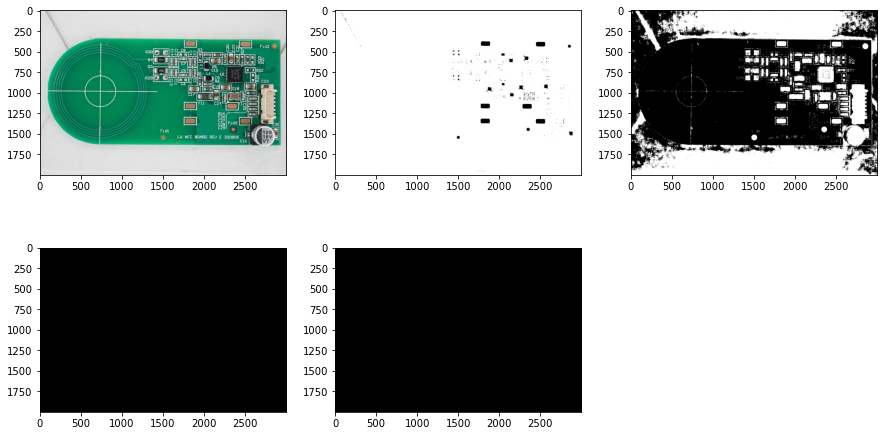

In [12]:
_ = plot_images(
    [img2] + get_board_mask(img2, return_segregation_masks=True) + get_board_mask(img2, return_final_masks=True),
    cmaps=[None, "gray", "gray", "gray", "gray"],
    layout=(2, 3),
    figsize=(15, 8),
)

Unable to find background, if the image has a not smooth background please crop it to the PCB.


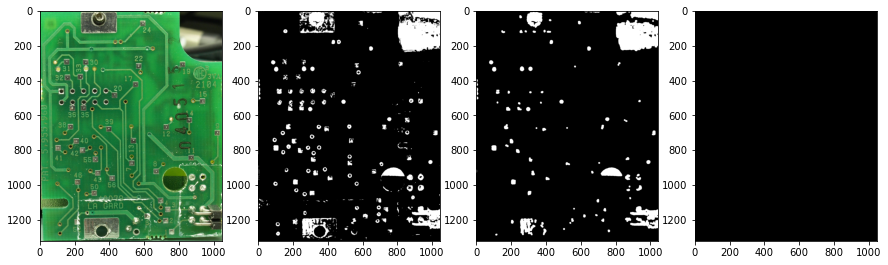

In [16]:
_ = plot_images(
    [img3] + get_board_mask(img3, return_segregation_masks=True) + get_board_mask(img3, return_final_masks=True),
    cmaps=[None, "gray", "gray", "gray", "gray"],
    layout=(1, 4),
    figsize=(15, 8),
)

For those cases a full mask is returned and the trail segregation in done in the entire image.

### Trail, non-trail, component and silk screen segregation.

For this segregation a k-means algorith is used.

As the pads and the silk screen are usually very similar they are tread as one entity.

After the main image is masked to select only the board the remaining pixels are converted to HSV and segregated using a k-means algorithm with k=3 if the background segregation was successful, the espected 3 layers are:

* Trails below solder mask;
* Non-trails below solder mask + components;
* Silk screen prints + pads.

If the background algorith fail an k=4 is used to account for the backgroud.

At the end the image is reassembled with high contrast colors:

In [24]:
_ = plot_images(
    [segregate_image(img1, color_seed=3)],
    layout=(1, 1),
    figsize=(20,15),
)

Selected background might not be correct, if the image has a not smooth background please crop it to the PCB.
Unable to find background, if the image has a not smooth background please crop it to the PCB.


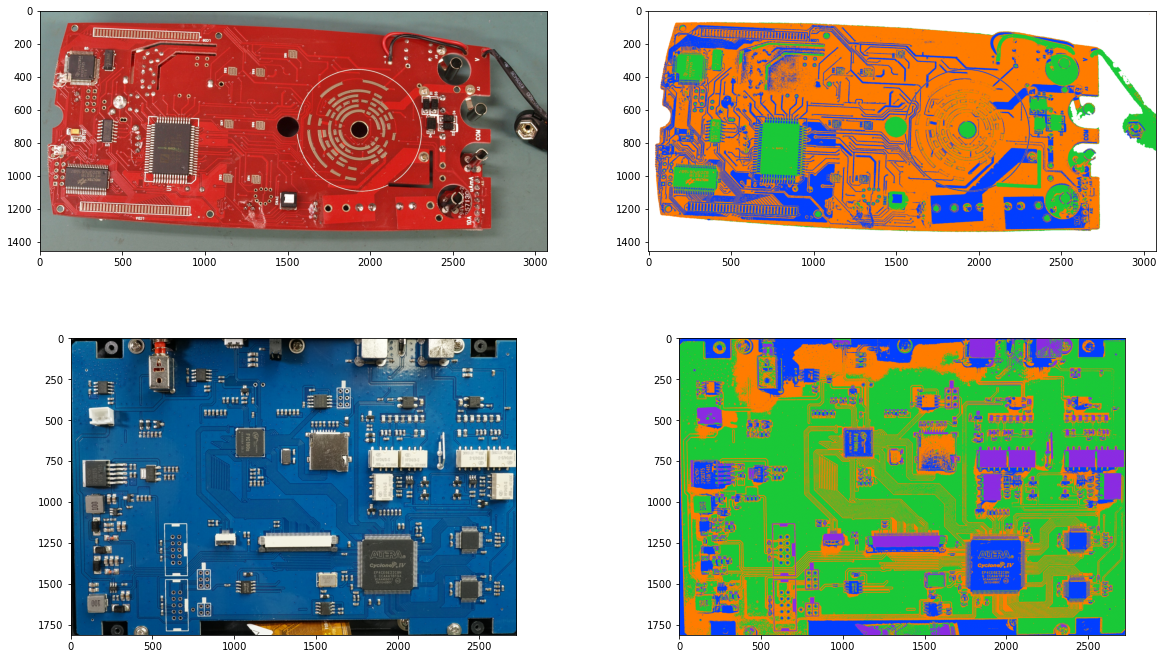

In [32]:
_ = plot_images(
    [img4 , segregate_image(img4), img5, segregate_image(img5)],
    layout=(2, 2),
    figsize=(20, 12),
)

### Limitations

* The implemented algorith is verry sensible to uneven light;
* If the background and pcb have similar hue the backgroung segregation can not be done and the PCB segregation will show poor results without previous cropping by the user;
* Segregation between pads and silk mask and segregation of components is not possible with the proposed algorithm;

Selected background might not be correct, if the image has a not smooth background please crop it to the PCB.
Unable to find background, if the image has a not smooth background please crop it to the PCB.
Unable to find background, if the image has a not smooth background please crop it to the PCB.


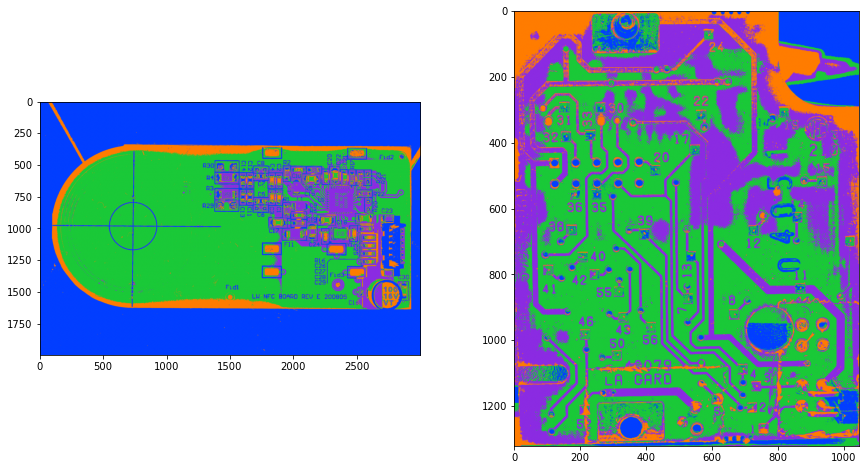

In [28]:
_ = plot_images(
    [segregate_image(img2), segregate_image(img3)],
    layout=(1, 2),
    figsize=(15, 8),
)